In [1]:
from bayes import Bayes         # for Bayes
import numpy as np              # for linspace
import scipy.stats as stats     # for binom, uniform
import matplotlib.pyplot as plt # for plot

%matplotlib inline

## Yesterday's Coin example

In [3]:
# here we're discretizing the heads probability p
p = np.linspace(0, 1, 101)

In [4]:
p_priors = { k:stats.uniform.pdf(k, loc=0, scale=1) for k in p}

In [5]:
def coin_likelihood(data, x):
    # what is the likelihood of drawing data
    # given that the number of heads is x
    # data = 0 for tails, 1 for heads
    return(stats.binom.pmf(data, 1, x))

I'm now creating an instance of that same `Bayes` object you used.

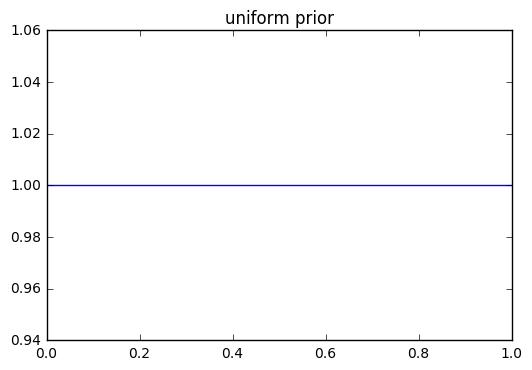

In [7]:
bayes = Bayes(p_priors.copy(), coin_likelihood)
bayes.plot(title="uniform prior")

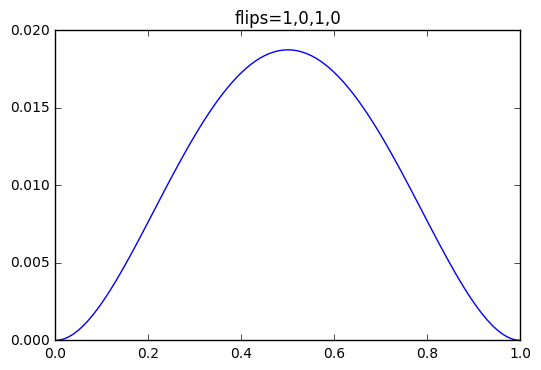

In [8]:
bayes.update(1) 
bayes.update(0) 
bayes.update(1)
bayes.update(0)

bayes.plot(title="flips=1,0,1,0")

Let's create a function to do that nicely...

In [10]:
def feed_bayes_and_plot(bayes, data_sequence):
    N = len(data_sequence)
    
    fig, axs = plt.subplots(1, N, figsize=(16, 3))
    
    # for each new data point
    for i, ax in enumerate(axs.flatten()):
        bayes.update(data_sequence[i])
        sorted_keys = sorted(bayes.prior.keys())
        sorted_probs = [bayes.prior[key] for key in sorted_keys]
        ax.plot(sorted_keys, sorted_probs)
        ax.set_title(",".join(map(str,data_sequence[0:i+1])))
        ax.get_yaxis().set_ticks([])
        if i==0:
            ax.set_ylabel('pdf')
        ax.set_xlabel('p')

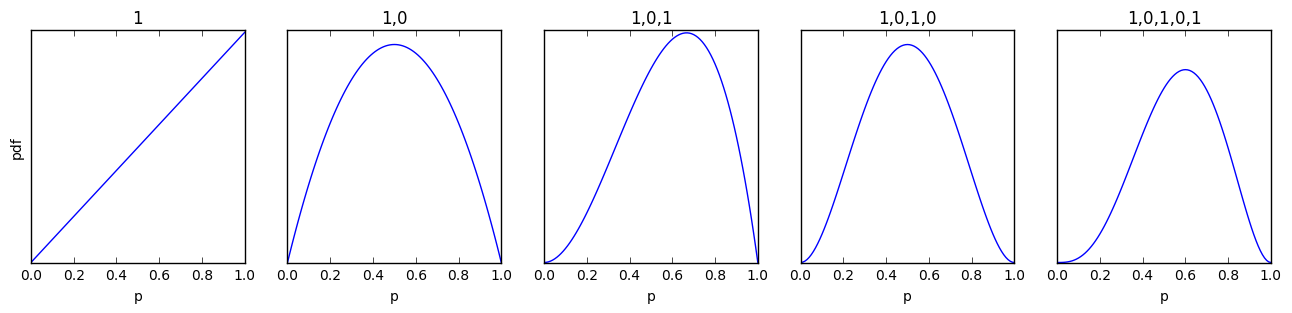

In [11]:
flips_A = [1,0,1,0,1]

bayesA = Bayes(p_priors.copy(), coin_likelihood)
feed_bayes_and_plot(bayesA, flips_A)

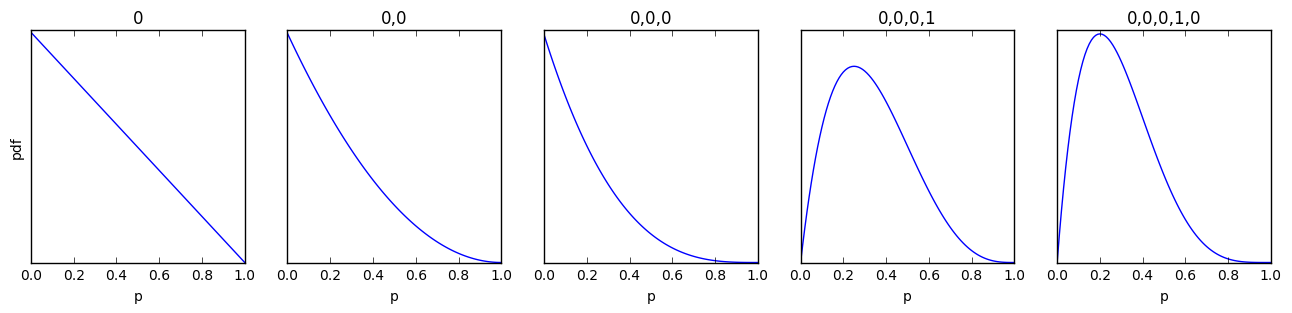

In [12]:
flips_B = [0,0,0,1,0]

bayesB = Bayes(p_priors.copy(), coin_likelihood)
feed_bayes_and_plot(bayesB, flips_B)